# Binary Classification Model for Santander Customer Satisfaction Using TensorFlow Take 3
### David Lowe
### July 6, 2020

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The Santander Customer Satisfaction dataset is a binary classification situation where we are trying to predict one of the two possible outcomes.

INTRODUCTION: Santander Bank sponsored a Kaggle competition to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late. In this competition, Santander has provided hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience. The exercise evaluates the submissions on the area under the ROC curve (AUC) between the predicted probability and the observed target.

In iteration Take1, we constructed several Multilayer Perceptron (MLP) models with two hidden layers. We also observed the best result that we could obtain using the two-layer model. Lastly, we applied the MLP model to Kaggle's test dataset and submitted a list of predictions to Kaggle for evaluation.

In iteration Take2, we constructed several Multilayer Perceptron (MLP) models with three hidden layers. We also observed the best result that we could obtain using the three-layer model. Lastly, we applied the MLP model to Kaggle's test dataset and submitted a list of predictions to Kaggle for evaluation.

In this Take3 iteration, we will construct several Multilayer Perceptron (MLP) models with four hidden layers. We will also observe the best result that we can obtain using the three-layer model. Lastly, we will apply the MLP model to Kaggle's test dataset and submit a list of predictions to Kaggle for evaluation.

ANALYSIS: From iteration Take1, all two-layer models achieved a ROC-AUC performance of between 79.9% and 81.1% after 25 epochs using the validation dataset. The 64/32-node model appeared to have the highest ROC-AUC of 81.142% with low variance. Lastly, when we applied the two-layer neural network model to the test dataset from Kaggle, we obtained a ROC-AUC score of 80.460%.

From iteration Take2, all three-layer models achieved a ROC-AUC performance of between 79.3% and 81.5% after 25 epochs using the validation dataset. The 224/160/96-node model appeared to have the highest ROC-AUC of 81.56% with low variance. Lastly, when we applied the three-layer neural network model to the test dataset from Kaggle, we obtained a ROC-AUC score of 81.193%.

From this Take3 iteration, all four-layer models achieved a ROC-AUC performance of between 78.5% and 81.3% after 25 epochs using the validation dataset. The 224/160/128/64-node model appeared to have the highest ROC-AUC of 81.51% with low variance. Lastly, when we applied the four-layer neural network model to the test dataset from Kaggle, we obtained a ROC-AUC score of 81.665%.

CONCLUSION: For this iteration, the four-layer model with 224/160/128/64 nodes appeared to have yielded the best result. For this dataset, we should consider experimenting with more MLP models with different configurations.

Dataset Used: Santander Customer Satisfaction Data Set

Dataset ML Model: Binary classification with numerical and categorical attributes

Dataset Reference: https://www.kaggle.com/c/santander-customer-satisfaction/overview

One potential source of performance benchmark: https://www.kaggle.com/c/santander-customer-satisfaction/leaderboard

A deep-learning modeling project generally can be broken down into five major tasks:

1. Prepare Environment
2. Load and Prepare Data
3. Define and Train Model
4. Evaluate and Optimize Model
5. Finalize Model and Make Predictions

# Task 1. Prepare Environment

In [1]:
# Install the packages to support accessing environment variable and SQL databases
!pip install python-dotenv PyMySQL

     |████████████████████████████████| 51kB 4.0MB/s 


In [2]:
# Retrieve GPU configuration information from Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
    print('and then re-execute this cell.')
else:
    print(gpu_info)

Fri Jul  3 15:07:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Retrieve memory configuration information from Colab
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
    print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
    print('re-execute this cell.')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime → "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [4]:
# Retrieve CPU information from the system
ncpu = !nproc
print("The number of available CPUs is:", ncpu[0])

The number of available CPUs is: 2


In [5]:
# Direct Colab to use TensorFlow v2
%tensorflow_version 2.x

In [6]:
# Set the random seed number for reproducible results
seedNum = 888

In [7]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math
import smtplib
import boto3
from datetime import datetime
from dotenv import load_dotenv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [8]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Check the number of GPUs accessible through TensorFlow
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set up the number of CPU cores available for multi-thread processing
n_jobs = 1

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set up the parent directory location for loading the dotenv files
useColab = False
if useColab:
    # Mount Google Drive locally for storing files
    from google.colab import drive
    drive.mount('/content/gdrive')
    gdrivePrefix = '/content/gdrive/My Drive/Colab_Downloads/'
    env_path = '/content/gdrive/My Drive/Colab Notebooks/'
    dotenv_path = env_path + "python_script.env"
    load_dotenv(dotenv_path=dotenv_path)

# Set up the dotenv file for retrieving environment variables
useLocalPC = False
if useLocalPC:
    env_path = "/Users/david/PycharmProjects/"
    dotenv_path = env_path + "python_script.env"
    load_dotenv(dotenv_path=dotenv_path)

# Set the number of folds for cross validation
n_folds = 5

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Configure the plotting style
plt.style.use('seaborn')

# Set Pandas options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)

# Set various default Keras modeling parameters
default_loss = 'binary_crossentropy'
default_metrics = [tf.keras.metrics.AUC()]
default_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
default_kernel_init = tf.keras.initializers.he_uniform(seed=seedNum)
default_epoch = 25
default_batch = 16

# Define the labels to use for graphing the data
train_metric = "auc"
validation_metric = "val_auc"
train_loss = "loss"
validation_loss = "val_loss"

Num GPUs Available:  1


In [9]:
# Set up the email notification function
def status_notify(msg_text):
    access_key = os.environ.get('SNS_ACCESS_KEY')
    secret_key = os.environ.get('SNS_SECRET_KEY')
    aws_region = os.environ.get('SNS_AWS_REGION')
    topic_arn = "arn:aws:sns:us-east-1:072417399597:PythonMLScriptNotification"
    if (access_key is None) or (secret_key is None) or (aws_region is None):
        sys.exit("Incomplete notification setup info. Script Processing Aborted!!!")
    sns = boto3.client('sns', aws_access_key_id=access_key, aws_secret_access_key=secret_key, region_name=aws_region)
    response = sns.publish(TopicArn=topic_arn, Message=msg_text)
    if response['ResponseMetadata']['HTTPStatusCode'] != 200 :
        print('Status notification not OK with HTTP status code:', response['ResponseMetadata']['HTTPStatusCode'])

In [10]:
# Reset the random number generators
def reset_random(x):
    random.seed(x)
    np.random.seed(x)
    tf.random.set_seed(x)

In [11]:
if (notifyStatus): status_notify("Task 1. Prepare Environment completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 2. Load and Prepare Data

In [12]:
if (notifyStatus): status_notify("Task 2. Load Data has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 2.a) Load Dataset

In [13]:
dataset_path = 'https://dainesanalytics.com/datasets/kaggle-santander-customer-satisfaction/train.csv'
Xy_original = pd.read_csv(dataset_path)

# Take a peek at the dataframe after import
Xy_original.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [14]:
Xy_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 371 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   ID                             int64  
 1   var3                           int64  
 2   var15                          int64  
 3   imp_ent_var16_ult1             float64
 4   imp_op_var39_comer_ult1        float64
 5   imp_op_var39_comer_ult3        float64
 6   imp_op_var40_comer_ult1        float64
 7   imp_op_var40_comer_ult3        float64
 8   imp_op_var40_efect_ult1        float64
 9   imp_op_var40_efect_ult3        float64
 10  imp_op_var40_ult1              float64
 11  imp_op_var41_comer_ult1        float64
 12  imp_op_var41_comer_ult3        float64
 13  imp_op_var41_efect_ult1        float64
 14  imp_op_var41_efect_ult3        float64
 15  imp_op_var41_ult1              float64
 16  imp_op_var39_efect_ult1        float64
 17  imp_op_var39_efect_ult3        float64
 18  imp_o

In [15]:
null_counts = Xy_original.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [16]:
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

Total number of NaN in the dataframe:  0


## 2.b) Data Cleaning

In [17]:
# Standardize the class column to the name of targetVar if required
Xy_original = Xy_original.rename(columns={'TARGET': 'targetVar'})

# Dropping features with no variation or predictive power
Xy_original.drop(columns=['ID','var3'], inplace=True)
Xy_original.drop(columns=['ind_var2_0','ind_var2','ind_var27_0','ind_var27','ind_var28_0','ind_var28','ind_var41','ind_var46_0','ind_var46'], inplace=True)
Xy_original.drop(columns=['num_var27_0','num_var27','num_var28_0','num_var28','num_var41','num_var46_0','num_var46'], inplace=True)
Xy_original.drop(columns=['saldo_var13_medio','saldo_var18','saldo_var27','saldo_var28','saldo_var29','saldo_var33','saldo_var34','saldo_var41','saldo_var46'], inplace=True)
Xy_original.drop(columns=['delta_imp_amort_var18_1y3','delta_imp_amort_var34_1y3','delta_imp_aport_var17_1y3','delta_imp_aport_var33_1y3'], inplace=True)
Xy_original.drop(columns=['delta_imp_reemb_var17_1y3','delta_imp_reemb_var33_1y3','delta_imp_trasp_var17_in_1y3','delta_imp_trasp_var17_out_1y3'], inplace=True)
Xy_original.drop(columns=['delta_imp_trasp_var33_in_1y3','delta_imp_trasp_var33_out_1y3','delta_num_aport_var17_1y3','delta_num_aport_var33_1y3'], inplace=True)
Xy_original.drop(columns=['delta_num_reemb_var17_1y3','delta_num_reemb_var33_1y3','delta_num_trasp_var17_in_1y3','delta_num_trasp_var17_out_1y3'], inplace=True)
Xy_original.drop(columns=['delta_num_trasp_var33_in_1y3','delta_num_trasp_var33_out_1y3'], inplace=True)
Xy_original.drop(columns=['imp_amort_var18_hace3','imp_amort_var18_ult1','imp_amort_var34_hace3','imp_amort_var34_ult1'], inplace=True)
Xy_original.drop(columns=['imp_aport_var33_hace3','imp_aport_var33_ult1'], inplace=True)
Xy_original.drop(columns=['imp_reemb_var13_hace3','imp_reemb_var17_hace3','imp_reemb_var17_ult1','imp_reemb_var33_hace3','imp_reemb_var33_ult1'], inplace=True)
Xy_original.drop(columns=['imp_trasp_var17_in_hace3','imp_trasp_var17_in_ult1','imp_trasp_var17_out_hace3','imp_trasp_var17_out_ult1'], inplace=True)
Xy_original.drop(columns=['imp_trasp_var33_in_hace3','imp_trasp_var33_in_ult1','imp_trasp_var33_out_hace3','imp_trasp_var33_out_ult1'], inplace=True)
Xy_original.drop(columns=['imp_venta_var44_hace3',], inplace=True)
Xy_original.drop(columns=['num_var2_0_ult1','num_var2_ult1','num_aport_var33_hace3','num_aport_var33_ult1'], inplace=True)
Xy_original.drop(columns=['num_meses_var13_medio_ult3','num_meses_var29_ult3','num_meses_var33_ult3'], inplace=True)
Xy_original.drop(columns=['num_op_var40_efect_ult1','num_op_var40_efect_ult3',], inplace=True)
Xy_original.drop(columns=['num_reemb_var13_hace3','num_reemb_var17_hace3','num_reemb_var17_ult1','num_reemb_var33_hace3','num_reemb_var33_ult1'], inplace=True)
Xy_original.drop(columns=['num_trasp_var17_in_hace3','num_trasp_var17_in_ult1','num_trasp_var17_out_hace3','num_trasp_var17_out_ult1'], inplace=True)
Xy_original.drop(columns=['num_trasp_var33_in_hace3','num_trasp_var33_in_ult1','num_trasp_var33_out_hace3','num_trasp_var33_out_ult1'], inplace=True)
Xy_original.drop(columns=['num_venta_var44_hace3',], inplace=True)
Xy_original.drop(columns=['saldo_var2_ult1'], inplace=True)
Xy_original.drop(columns=['saldo_medio_var13_medio_hace2','saldo_medio_var13_medio_hace3','saldo_medio_var13_medio_ult1','saldo_medio_var13_medio_ult3'], inplace=True)
Xy_original.drop(columns=['saldo_medio_var29_hace2','saldo_medio_var29_hace3','saldo_medio_var29_ult1','saldo_medio_var29_ult3'], inplace=True)
Xy_original.drop(columns=['saldo_medio_var33_hace2','saldo_medio_var33_hace3','saldo_medio_var33_ult1','saldo_medio_var33_ult3'], inplace=True)

# Correct mis-coding or data type for some features
Xy_original['var15'] = Xy_original['var15'].astype('float64')
Xy_original['var21'] = Xy_original['var21'].astype('float64')
Xy_original['var36'] = Xy_original['var36'].astype('float64')

# Take a peek at the dataframe after cleaning
Xy_original.head(10)

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var39,ind_var44_0,ind_var44,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13,saldo_var14,saldo_var17,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var31,saldo_var32,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_venta_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var17_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var13_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_va

In [18]:
Xy_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 270 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   var15                          float64
 1   imp_ent_var16_ult1             float64
 2   imp_op_var39_comer_ult1        float64
 3   imp_op_var39_comer_ult3        float64
 4   imp_op_var40_comer_ult1        float64
 5   imp_op_var40_comer_ult3        float64
 6   imp_op_var40_efect_ult1        float64
 7   imp_op_var40_efect_ult3        float64
 8   imp_op_var40_ult1              float64
 9   imp_op_var41_comer_ult1        float64
 10  imp_op_var41_comer_ult3        float64
 11  imp_op_var41_efect_ult1        float64
 12  imp_op_var41_efect_ult3        float64
 13  imp_op_var41_ult1              float64
 14  imp_op_var39_efect_ult1        float64
 15  imp_op_var39_efect_ult3        float64
 16  imp_op_var39_ult1              float64
 17  imp_sal_var16_ult1             float64
 18  ind_v

In [19]:
null_counts = Xy_original.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [20]:
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

Total number of NaN in the dataframe:  0


## 2.c) Feature Scaling and Pre-processing

In [21]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(Xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [22]:
# We create attribute-only and target-only datasets (X_original and y_original)
# for various visualization and cleaning/transformation operations

if targetCol == totCol:
    X_original = Xy_original.iloc[:,0:totAttr]
    y_original = Xy_original.iloc[:,totAttr]
else:
    X_original = Xy_original.iloc[:,1:totCol]
    y_original = Xy_original.iloc[:,0]

print("Xy_original.shape: {} X_original.shape: {} y_original.shape: {}".format(Xy_original.shape, X_original.shape, y_original.shape))

Xy_original.shape: (76020, 270) X_original.shape: (76020, 269) y_original.shape: (76020,)


In [23]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 4
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to display the data visualization plots
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = dispCol*4
fig_size[1] = dispRow*4
plt.rcParams["figure.figsize"] = fig_size

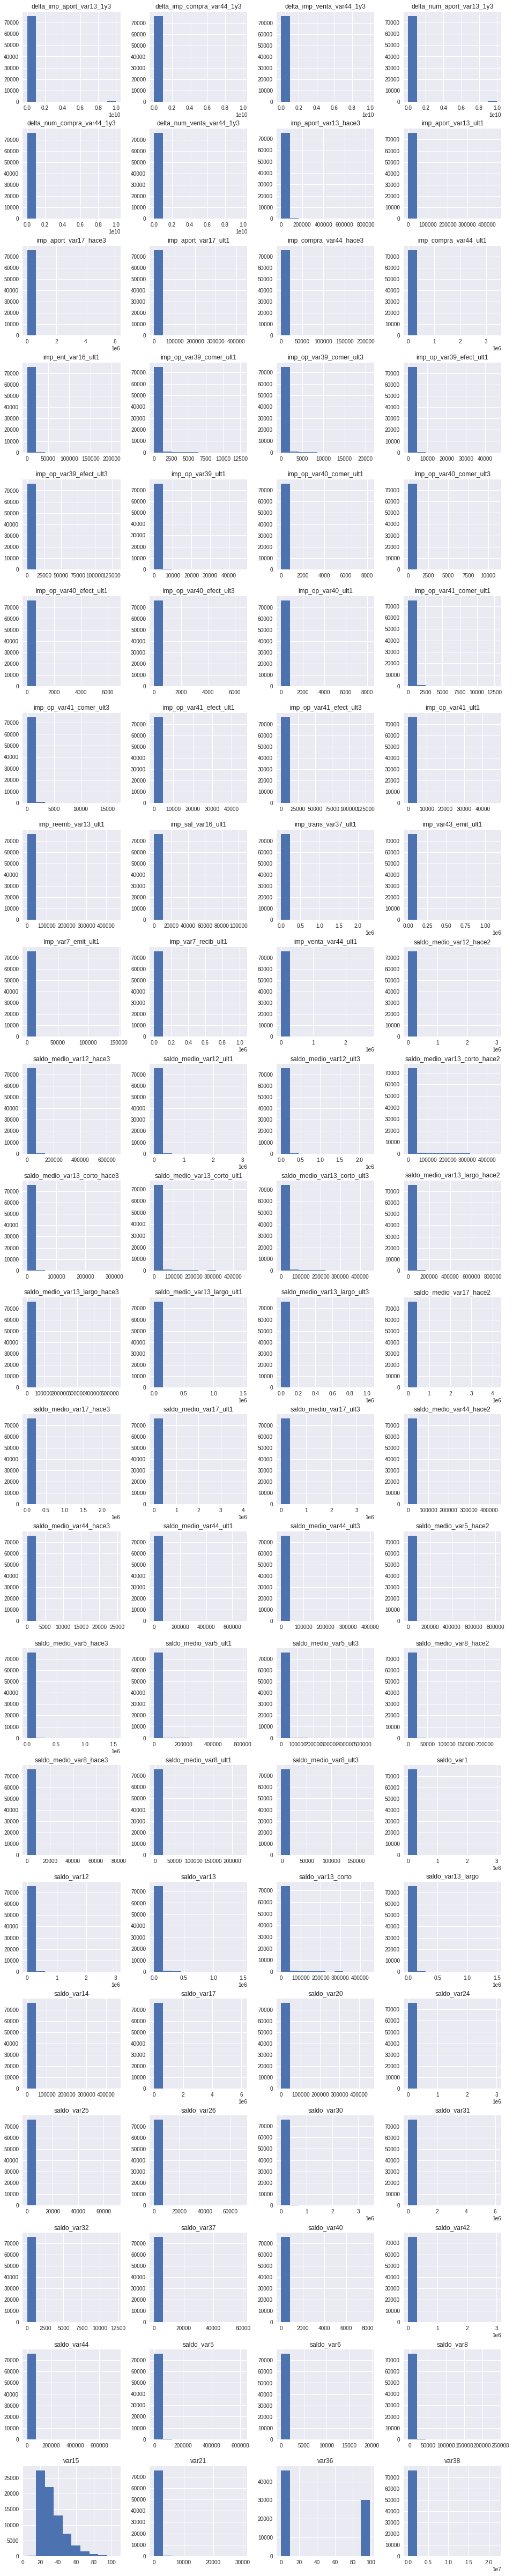

In [24]:
# Histograms for each attribute before pre-processing
columns_to_scale = X_original.columns[X_original.dtypes == 'float64'].tolist()
X_original[columns_to_scale].hist(layout=(dispRow,dispCol))
plt.show()

In [25]:
# Apply feature scaling and transformation
print('Columns to scale are:', columns_to_scale)
scaler = preprocessing.StandardScaler()
X_original[columns_to_scale] = scaler.fit_transform(X_original[columns_to_scale])
print(X_original.head())

Columns to scale are: ['var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'saldo_var1', 'saldo_var5', 'saldo_var6', 'saldo_var8', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13', 'saldo_var14', 'saldo_var17', 'saldo_var20', 'saldo_var24', 'saldo_var26', 'saldo_var25', 'saldo_var30', 'saldo_var31', 'saldo_var32', 'saldo_var37', 'saldo_var40', 'saldo_var42', 'saldo_var44', 'var36', 'delta_imp_aport_var13_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_aport_var13_1y3', 'delta_num_compra_var44_1y3', 'delta_num_venta_var44_1y3', 'imp_aport_var13_hace3', 'imp

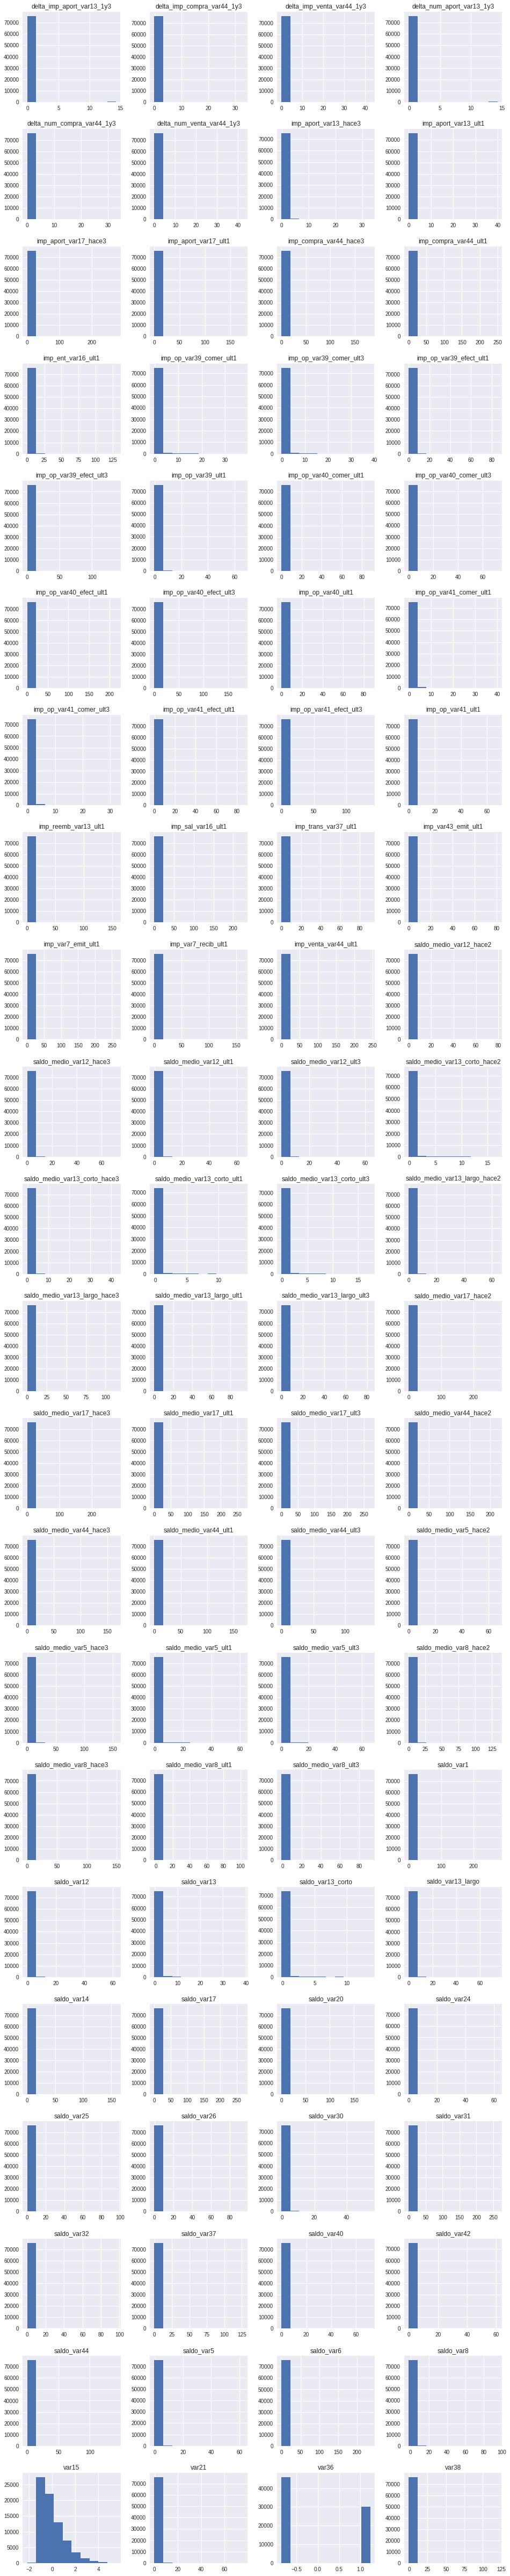

In [26]:
# Histograms for each attribute after pre-processing
X_original[columns_to_scale].hist(layout=(dispRow,dispCol))
plt.show()

## 2.d) Splitting Data into Training and Test Sets

In [27]:
# # Perform one-hot-encoding before splitting into trainig and test
# X_original = pd.get_dummies(X_original)
# print(X_original.info())

In [28]:
# Encode class values as integers and perform one-hot-encoding
# y_encoded = y_original.ravel()
# encoder = preprocessing.LabelEncoder()
# encoder.fit(y_original)
# y_encoded = encoder.transform(y_original)
# print(y_encoded)

In [29]:
# Split the data further into training and test datasets
X_encoded = X_original.to_numpy()
if (splitDataset):
    X_train_df, X_validation_df, y_train_df, y_validation_df = train_test_split(X_original, y_original, test_size=splitPercentage, stratify=y_original, random_state=seedNum)
else:
    X_train_df, y_train_df = X_original, y_original
    X_validation_df, y_validation_df = X_original, y_original
print("X_train_df.shape: {} X_train_df.type: {}".format(X_train_df.shape, type(X_train_df)))
print("y_train_df.shape: {} y_train_df.type: {}".format(y_train_df.shape, type(y_train_df)))
print("X_validation_df.shape: {} X_validation_df.type: {}".format(X_validation_df.shape, type(X_validation_df)))
print("y_validation_df.shape: {} y_validation_df.type: {}".format(y_validation_df.shape, type(y_validation_df)))

X_train_df.shape: (57015, 269) X_train_df.type: <class 'pandas.core.frame.DataFrame'>
y_train_df.shape: (57015,) y_train_df.type: <class 'pandas.core.series.Series'>
X_validation_df.shape: (19005, 269) X_validation_df.type: <class 'pandas.core.frame.DataFrame'>
y_validation_df.shape: (19005,) y_validation_df.type: <class 'pandas.core.series.Series'>


In [30]:
# # Finalize the training and testing datasets for the modeling activities
X_train = X_train_df.to_numpy()
y_train = y_train_df.ravel()
X_validation = X_validation_df.to_numpy()
y_validation = y_validation_df.ravel()
print("X_train.shape: {} X_train.type: {}".format(X_train.shape, type(X_train)))
print("y_train.shape: {} y_train.type: {}".format(y_train.shape, type(y_train)))
print("X_validation.shape: {} X_validation.type: {}".format(X_validation.shape, type(X_validation)))
print("y_validation.shape: {} y_validation.type: {}".format(y_validation.shape, type(y_validation)))

X_train.shape: (57015, 269) X_train.type: <class 'numpy.ndarray'>
y_train.shape: (57015,) y_train.type: <class 'numpy.ndarray'>
X_validation.shape: (19005, 269) X_validation.type: <class 'numpy.ndarray'>
y_validation.shape: (19005,) y_validation.type: <class 'numpy.ndarray'>


In [31]:
if (notifyStatus): status_notify("Task 2. Load Data completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 3. Define and Train Model

In [32]:
if (notifyStatus): status_notify("Task 3. Define and Fit Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [33]:
# Define the model with the default parameters
def create_nn_model(layer1_nodes=48, layer2_nodes=32, layer3_nodes=16, layer4_nodes=8, layer1_dropout=0.2, layer2_dropout=0.2, layer3_dropout=0.2, layer4_dropout=0.2):
    default_model = Sequential()
    default_model.add(Dense(layer1_nodes, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(layer1_dropout))
    default_model.add(Dense(layer2_nodes, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(layer2_dropout))
    default_model.add(Dense(layer3_nodes, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(layer3_dropout))
    default_model.add(Dense(layer4_nodes, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(layer4_dropout))
    default_model.add(Dense(1, activation='sigmoid', kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer, metrics=default_metrics)
    return default_model

In [34]:
startTimeModule = datetime.now()

# Calculate the baseline model for benchmarking reference
reset_random(seedNum)
baseline_model = create_nn_model()
training_hist = baseline_model.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch,
                                   validation_data=(X_validation, y_validation), verbose=1)
print('Total time for model fitting:', (datetime.now() - startTimeModule))

Epoch 1/25
3564/3564 [==============================] - 23s 6ms/step - loss: 0.2197 - auc: 0.5915 - val_loss: 0.1605 - val_auc: 0.6920
Epoch 2/25
3564/3564 [==============================] - 22s 6ms/step - loss: 0.1579 - auc: 0.7050 - val_loss: 0.1506 - val_auc: 0.7562
Epoch 3/25
3564/3564 [==============================] - 22s 6ms/step - loss: 0.1521 - auc: 0.7461 - val_loss: 0.1578 - val_auc: 0.7813
Epoch 4/25
3564/3564 [==============================] - 22s 6ms/step - loss: 0.1508 - auc: 0.7525 - val_loss: 0.1529 - val_auc: 0.7837
Epoch 5/25
3564/3564 [==============================] - 22s 6ms/step - loss: 0.1492 - auc: 0.7618 - val_loss: 0.1545 - val_auc: 0.7588
Epoch 6/25
3564/3564 [==============================] - 22s 6ms/step - loss: 0.1482 - auc: 0.7678 - val_loss: 0.1599 - val_auc: 0.7815
Epoch 7/25
3564/3564 [==============================] - 22s 6ms/step - loss: 0.1473 - auc: 0.7721 - val_loss: 0.1494 - val_auc: 0.7758
Epoch 8/25
3564/3564 [==============================] -

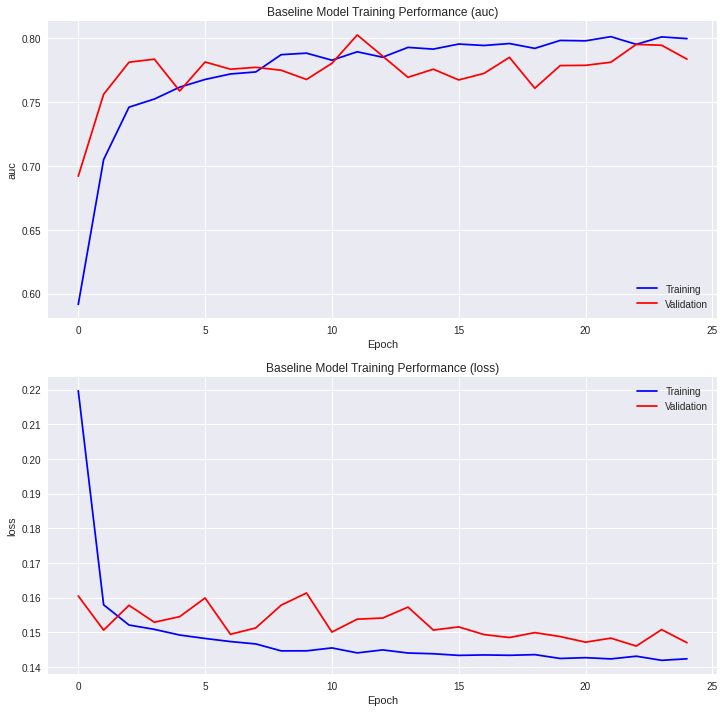

In [35]:
# Summarize model training hisotry
fig, axs = plt.subplots(2, 1, figsize=(12,12))
plt.subplot(211)
plt.plot(training_hist.history[train_metric], color='blue', label='Training')
plt.plot(training_hist.history[validation_metric], color='red', label='Validation')
plt.title('Baseline Model Training Performance (%s)' % (train_metric))
plt.ylabel(train_metric)
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.subplot(212)
plt.plot(training_hist.history[train_loss], color='blue', label='Training')
plt.plot(training_hist.history[validation_loss], color='red', label='Validation')
plt.title('Baseline Model Training Performance (%s)' % (train_loss))
plt.ylabel(train_loss)
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [36]:
if (notifyStatus): status_notify("Task 3. Define and Fit Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 4. Explore Various Four-Layer Models

In [37]:
if (notifyStatus): status_notify("Task 4. Explore Various One-Layer Models has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [38]:
# Initialize the grid parameters and fit the models
nodes_grid = [(48, 32, 16, 8), (96, 64, 32, 16), (144, 112, 64, 32), (192, 128, 96, 48), (224, 160, 128, 64)]
layer1_dropout = 0.2
layer2_dropout = 0.3
layer3_dropout = 0.4
layer4_dropout = 0.5

# Build dataframe for reporting model performance summary
nodes_performance = pd.DataFrame(columns=['model_name','train_score','validation_score','variance','layer1_nodes','layer2_nodes','layer3_nodes','layer4_nodes','layer1_dropout','layer2_dropout','layer3_dropout','layer4_dropout'])

serial_number = 0
for param in nodes_grid:
    startTimeModule = datetime.now()
    serial_number = serial_number + 1
    model_name = "Model_" + str(serial_number).zfill(3)
    layer1_nodes, layer2_nodes, layer3_nodes, layer4_nodes = param
    reset_random(seedNum)
    grid_search_model = create_nn_model(layer1_nodes, layer2_nodes, layer3_nodes, layer4_nodes, layer1_dropout, layer2_dropout, layer3_dropout, layer4_dropout)
    print('Processing model %s with Layer 1: %d, Layer 2: %d, Layer 3: %d, and Layer 4: %d nodes' % (model_name, layer1_nodes, layer2_nodes, layer3_nodes, layer4_nodes))
    print(grid_search_model.get_config())
    model_train_hist = grid_search_model.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_validation, y_validation), verbose=0)
    train_score = model_train_hist.history[train_metric][-1]
    validation_score = model_train_hist.history[validation_metric][-1]
    train_val_variance = abs(train_score - validation_score)
    print('The maximum score for the training dataset: %.2f%%' % (max(model_train_hist.history[train_metric])*100))
    print('The score at the last epoch for the training dataset: %.2f%%' % (train_score*100))
    print('The maximum score for the validation dataset: %.2f%%' % (max(model_train_hist.history[validation_metric])*100))
    print('The score at the last epoch for the validation dataset: %.2f%%' % (validation_score*100))
    print('The training vs. validation variance at the last epoch is: %.4f' % (train_val_variance))
    print('Total time for model fitting:', (datetime.now() - startTimeModule), '\n')
    nodes_performance = nodes_performance.append({'model_name': model_name, 'train_score': train_score, 'validation_score': validation_score, 'variance': train_val_variance, 
                                                  'layer1_nodes': layer1_nodes, 'layer2_nodes': layer2_nodes, 'layer3_nodes': layer3_nodes, 'layer4_nodes': layer4_nodes,
                                                  'layer1_dropout': layer1_dropout, 'layer2_dropout': layer2_dropout, 'layer3_dropout': layer3_dropout, 'layer4_dropout': layer4_dropout},
                                                  ignore_index=True)

nodes_performance.set_index('model_name', inplace=True)

Processing model Model_001 with Layer 1: 48, Layer 2: 32, Layer 3: 16, and Layer 4: 8 nodes
{'name': 'sequential_1', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_5', 'trainable': True, 'batch_input_shape': (None, 269), 'dtype': 'float32', 'units': 48, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_4', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([1]), 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initialize

In [39]:
# Display the model performance summary by validation score
nodes_performance.sort_values(by=['validation_score'], ascending=False)

,train_score,validation_score,variance,layer1_nodes,layer2_nodes,layer3_nodes,layer4_nodes,layer1_dropout,layer2_dropout,layer3_dropout,layer4_dropout
model_name,,,,,,,,,,,
Model_005,0.817401,0.813402,0.003999,224,160,128,64,0.2,0.3,0.4,0.5
Model_001,0.785850,0.801010,0.015161,48,32,16,8,0.2,0.3,0.4,0.5
Model_003,0.809391,0.800676,0.008715,144,112,64,32,0.2,0.3,0.4,0.5
Model_004,0.813082,0.790081,0.023001,192,128,96,48,0.2,0.3,0.4,0.5
Model_002,0.800446,0.785135,0.015312,96,64,32,16,0.2,0.3,0.4,0.5


In [40]:
# Display the model performance summary by variance
nodes_performance.sort_values(by=['variance'])

,train_score,validation_score,variance,layer1_nodes,layer2_nodes,layer3_nodes,layer4_nodes,layer1_dropout,layer2_dropout,layer3_dropout,layer4_dropout
model_name,,,,,,,,,,,
Model_005,0.817401,0.813402,0.003999,224,160,128,64,0.2,0.3,0.4,0.5
Model_003,0.809391,0.800676,0.008715,144,112,64,32,0.2,0.3,0.4,0.5
Model_001,0.785850,0.801010,0.015161,48,32,16,8,0.2,0.3,0.4,0.5
Model_002,0.800446,0.785135,0.015312,96,64,32,16,0.2,0.3,0.4,0.5
Model_004,0.813082,0.790081,0.023001,192,128,96,48,0.2,0.3,0.4,0.5


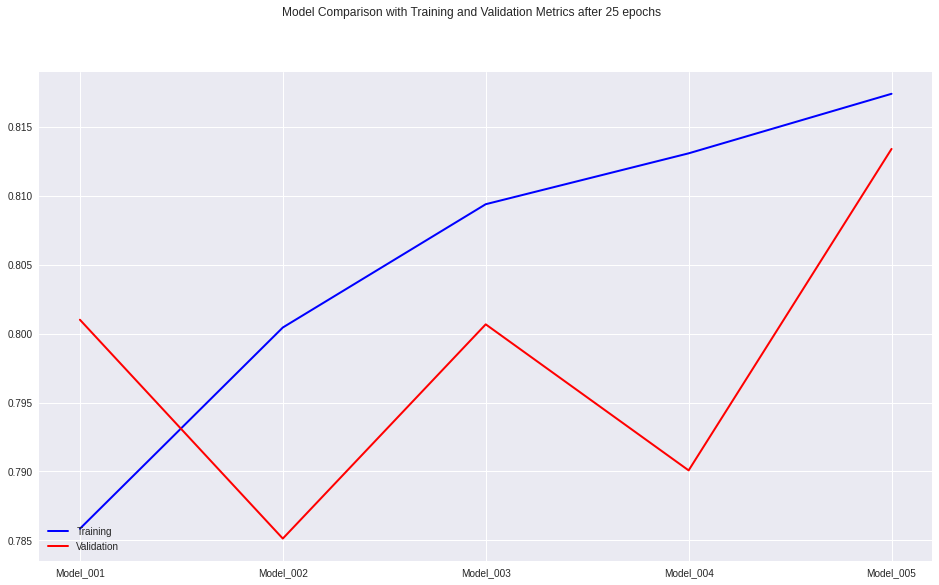

In [41]:
# Spot-checking the models
fig = plt.figure(figsize=(16,9))
title = 'Model Comparison with Training and Validation Metrics after ' + str(default_epoch) + ' epochs'
fig.suptitle(title)
ax1 = fig.add_subplot(111)
ax1.plot(nodes_performance['train_score'], color='b', lw=2.)
ax1.plot(nodes_performance['validation_score'], color='r', lw=2.)
plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

In [42]:
# Initialize the grid parameters and fit the models
model_to_use = 'Model_005'
layer1_nodes = nodes_performance.loc[model_to_use]['layer1_nodes']
layer2_nodes = nodes_performance.loc[model_to_use]['layer2_nodes']
layer3_nodes = nodes_performance.loc[model_to_use]['layer3_nodes']
layer4_nodes = nodes_performance.loc[model_to_use]['layer4_nodes']
layer1_dropout_grid = [0.2, 0.3, 0.4, 0.5]
layer2_dropout_grid = [0.3, 0.4, 0.5]
layer3_dropout_grid = [0.3, 0.4, 0.5]
layer4_dropout_grid = [0.4, 0.5]

# Build dataframe for reporting model performance summary
dropout_performance = pd.DataFrame(columns=['model_name','train_score','validation_score','variance','layer1_nodes','layer2_nodes','layer3_nodes','layer4_nodes',
                                            'layer1_dropout','layer2_dropout','layer3_dropout','layer4_dropout'])

serial_number = 0
for layer1_dropout in layer1_dropout_grid:
    for layer2_dropout in layer2_dropout_grid:
        for layer3_dropout in layer3_dropout_grid:
            for layer4_dropout in layer4_dropout_grid:
                startTimeModule = datetime.now()
                serial_number = serial_number + 1
                model_name = "Model_" + str(serial_number).zfill(3)
                reset_random(seedNum)
                grid_search_model = create_nn_model(layer1_nodes, layer2_nodes, layer3_nodes, layer4_nodes, layer1_dropout, layer2_dropout, layer3_dropout, layer4_dropout)
                print('Processing model %s with Layer 1: %d, Layer 2: %d, Layer 3: %d, and Layer 4: %d nodes and dropout parameters of Layer 1: %.2f, Layer 2: %.2f, Layer 3: %.2f, and Layer 4: %.2f' %
                    (model_name, layer1_nodes, layer2_nodes, layer3_nodes, layer4_nodes, layer1_dropout, layer2_dropout, layer3_dropout, layer4_dropout))
                print(grid_search_model.get_config())
                model_train_hist = grid_search_model.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, validation_data=(X_validation, y_validation), verbose=0)
                train_score = model_train_hist.history[train_metric][-1]
                validation_score = model_train_hist.history[validation_metric][-1]
                train_val_variance = abs(train_score - validation_score)
                print('The maximum score for the training dataset: %.2f%%' % (max(model_train_hist.history[train_metric])*100))
                print('The score at the last epoch for the training dataset: %.2f%%' % (train_score*100))
                print('The maximum score for the validation dataset: %.2f%%' % (max(model_train_hist.history[validation_metric])*100))
                print('The score at the last epoch for the validation dataset: %.2f%%' % (validation_score*100))
                print('The training vs. validation variance at the last epoch is: %.4f' % (train_val_variance))
                print('Total time for model fitting:', (datetime.now() - startTimeModule), '\n')
                dropout_performance = dropout_performance.append({'model_name': model_name, 'train_score': train_score, 'validation_score': validation_score, 'variance': train_val_variance,
                                                                'layer1_nodes': layer1_nodes, 'layer2_nodes': layer2_nodes, 'layer3_nodes': layer3_nodes, 'layer4_nodes': layer4_nodes,
                                                                'layer1_dropout': layer1_dropout, 'layer2_dropout': layer2_dropout, 'layer3_dropout': layer3_dropout, 'layer4_dropout': layer4_dropout},
                                                                ignore_index=True)

dropout_performance.set_index('model_name', inplace=True)

Processing model Model_001 with Layer 1: 224, Layer 2: 160, Layer 3: 128, and Layer 4: 64 nodes and dropout parameters of Layer 1: 0.20, Layer 2: 0.30, Layer 3: 0.30, and Layer 4: 0.40
{'name': 'sequential_6', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_30', 'trainable': True, 'batch_input_shape': (None, 269), 'dtype': 'float32', 'units': 224, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 2.0, 'mode': 'fan_in', 'distribution': 'uniform', 'seed': 888}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_24', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([1]), 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', '

In [43]:
# Display the model performance summary by validation score
dropout_performance.sort_values(by=['validation_score'], ascending=False).head()

,train_score,validation_score,variance,layer1_nodes,layer2_nodes,layer3_nodes,layer4_nodes,layer1_dropout,layer2_dropout,layer3_dropout,layer4_dropout
model_name,,,,,,,,,,,
Model_041,0.807943,0.816169,0.008226,224,160,128,64,0.4,0.3,0.5,0.4
Model_024,0.810178,0.815149,0.004970,224,160,128,64,0.3,0.3,0.5,0.5
Model_025,0.812575,0.815145,0.002570,224,160,128,64,0.3,0.4,0.3,0.4
Model_010,0.812598,0.814977,0.002380,224,160,128,64,0.2,0.4,0.4,0.5
Model_022,0.813360,0.814837,0.001477,224,160,128,64,0.3,0.3,0.4,0.5


In [44]:
# Display the model performance summary by variance
dropout_performance.sort_values(by=['variance']).head()

,train_score,validation_score,variance,layer1_nodes,layer2_nodes,layer3_nodes,layer4_nodes,layer1_dropout,layer2_dropout,layer3_dropout,layer4_dropout
model_name,,,,,,,,,,,
Model_064,0.803945,0.803987,0.000042,224,160,128,64,0.5,0.4,0.4,0.5
Model_059,0.806145,0.806528,0.000383,224,160,128,64,0.5,0.3,0.5,0.4
Model_033,0.812387,0.811905,0.000482,224,160,128,64,0.3,0.5,0.4,0.4
Model_035,0.807973,0.807471,0.000502,224,160,128,64,0.3,0.5,0.5,0.4
Model_012,0.811739,0.811033,0.000706,224,160,128,64,0.2,0.4,0.5,0.5


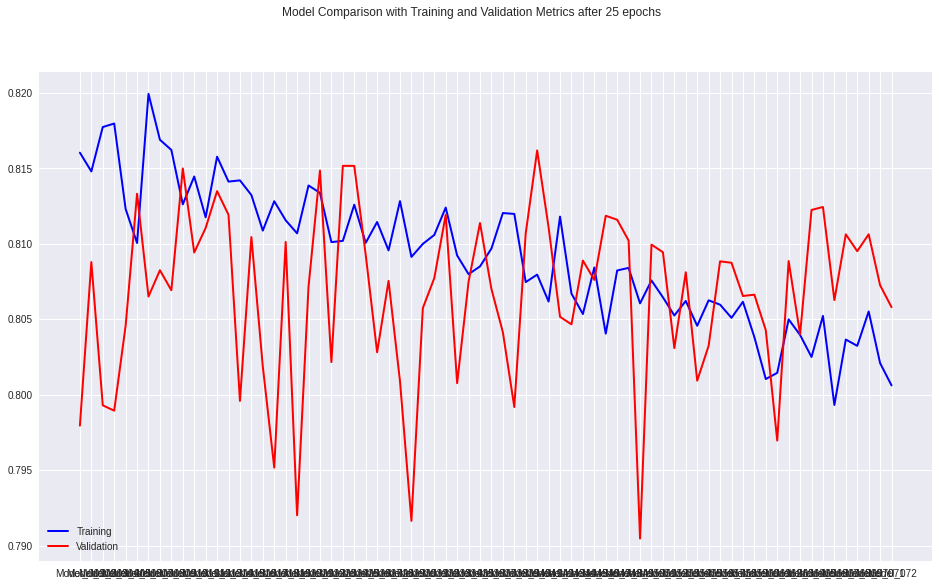

In [45]:
# Spot-checking the models
fig = plt.figure(figsize=(16,9))
title = 'Model Comparison with Training and Validation Metrics after ' + str(default_epoch) + ' epochs'
fig.suptitle(title)
ax1 = fig.add_subplot(111)
ax1.plot(dropout_performance['train_score'], color='b', lw=2.)
ax1.plot(dropout_performance['validation_score'], color='r', lw=2.)
plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

In [46]:
if (notifyStatus): status_notify("Task 4. Explore Various One-Layer Models completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Task 5. Finalize Model and Make Predictions

In [47]:
if (notifyStatus): status_notify("Task 5. Finalize Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

### 5.a) Create a standalone model using all available data

In [48]:
# Combining the training and testing datasets to form the complete dataset that will be used for training the final model
X_complete = np.vstack((X_train, X_validation))
y_complete = np.concatenate((y_train, y_validation))
print("X_complete.shape: {} y_complete.shape: {}".format(X_complete.shape, y_complete.shape))

X_complete.shape: (76020, 269) y_complete.shape: (76020,)


In [49]:
model_to_use = 'Model_025'
layer1_nodes = dropout_performance.loc[model_to_use]['layer1_nodes']
layer2_nodes = dropout_performance.loc[model_to_use]['layer2_nodes']
layer3_nodes = dropout_performance.loc[model_to_use]['layer3_nodes']
layer4_nodes = dropout_performance.loc[model_to_use]['layer4_nodes']
layer1_dropout = dropout_performance.loc[model_to_use]['layer1_dropout']
layer2_dropout = dropout_performance.loc[model_to_use]['layer2_dropout']
layer3_dropout = dropout_performance.loc[model_to_use]['layer3_dropout']
layer4_dropout = dropout_performance.loc[model_to_use]['layer4_dropout']
print('Processing %s with Layer 1: %d, Layer 2: %d, Layer 3: %d, and Layer 4: %d nodes and dropout parameters of Layer 1: %.2f, Layer 2: %.2f, Layer 3: %.2f, and Layer 4: %.2f' %
      (model_to_use, layer1_nodes, layer2_nodes, layer3_nodes, layer4_nodes, layer1_dropout, layer2_dropout, layer3_dropout, layer4_dropout))
reset_random(seedNum)
final_model = create_nn_model(layer1_nodes, layer2_nodes, layer3_nodes, layer4_nodes, layer1_dropout, layer2_dropout, layer3_dropout, layer4_dropout)
training_hist = final_model.fit(X_complete, y_complete, epochs=default_epoch, batch_size=default_batch, verbose=0)
print(final_model.summary())

Processing Model_025 with Layer 1: 224, Layer 2: 160, Layer 3: 128, and Layer 4: 64 nodes and dropout parameters of Layer 1: 0.30, Layer 2: 0.40, Layer 3: 0.30, and Layer 4: 0.40
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_390 (Dense)            (None, 224)               60480     
_________________________________________________________________
batch_normalization_312 (Bat (None, 224)               896       
_________________________________________________________________
dropout_312 (Dropout)        (None, 224)               0         
_________________________________________________________________
dense_391 (Dense)            (None, 160)               36000     
_________________________________________________________________
batch_normalization_313 (Bat (None, 160)               640       
_________________________________________________________________
dropou

### 5.b) Create Submission Files for Kaggle Evaluation

In [50]:
dataset_path = 'https://dainesanalytics.com/datasets/kaggle-santander-customer-satisfaction/test.csv'
X_kaggle_data = pd.read_csv(dataset_path)

# Take a peek at the dataframe after import
X_kaggle_data.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [51]:
# Set up the dataframe to capture predictions for Kaggle submission
y_submission_kaggle = pd.DataFrame(columns=['ID', 'TARGET'])
y_submission_kaggle['ID'] = X_kaggle_data['ID']
y_submission_kaggle.head()

,ID,TARGET
0,2,NaN
1,5,NaN
2,6,NaN
3,7,NaN
4,9,NaN


In [52]:
# Check to see whether the test dataset contains any NaN
null_counts = X_kaggle_data.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [53]:
print('Total number of NaN in the dataframe: ', X_kaggle_data.isnull().sum().sum())

Total number of NaN in the dataframe:  0


In [54]:
# Apply the same data pre-processing steps to the test data

# Dropping features with no variation or predictive power
X_kaggle_data.drop(columns=['ID','var3'], inplace=True)
X_kaggle_data.drop(columns=['ind_var2_0','ind_var2','ind_var27_0','ind_var27','ind_var28_0','ind_var28','ind_var41','ind_var46_0','ind_var46'], inplace=True)
X_kaggle_data.drop(columns=['num_var27_0','num_var27','num_var28_0','num_var28','num_var41','num_var46_0','num_var46'], inplace=True)
X_kaggle_data.drop(columns=['saldo_var13_medio','saldo_var18','saldo_var27','saldo_var28','saldo_var29','saldo_var33','saldo_var34','saldo_var41','saldo_var46'], inplace=True)
X_kaggle_data.drop(columns=['delta_imp_amort_var18_1y3','delta_imp_amort_var34_1y3','delta_imp_aport_var17_1y3','delta_imp_aport_var33_1y3'], inplace=True)
X_kaggle_data.drop(columns=['delta_imp_reemb_var17_1y3','delta_imp_reemb_var33_1y3','delta_imp_trasp_var17_in_1y3','delta_imp_trasp_var17_out_1y3'], inplace=True)
X_kaggle_data.drop(columns=['delta_imp_trasp_var33_in_1y3','delta_imp_trasp_var33_out_1y3','delta_num_aport_var17_1y3','delta_num_aport_var33_1y3'], inplace=True)
X_kaggle_data.drop(columns=['delta_num_reemb_var17_1y3','delta_num_reemb_var33_1y3','delta_num_trasp_var17_in_1y3','delta_num_trasp_var17_out_1y3'], inplace=True)
X_kaggle_data.drop(columns=['delta_num_trasp_var33_in_1y3','delta_num_trasp_var33_out_1y3'], inplace=True)
X_kaggle_data.drop(columns=['imp_amort_var18_hace3','imp_amort_var18_ult1','imp_amort_var34_hace3','imp_amort_var34_ult1'], inplace=True)
X_kaggle_data.drop(columns=['imp_aport_var33_hace3','imp_aport_var33_ult1'], inplace=True)
X_kaggle_data.drop(columns=['imp_reemb_var13_hace3','imp_reemb_var17_hace3','imp_reemb_var17_ult1','imp_reemb_var33_hace3','imp_reemb_var33_ult1'], inplace=True)
X_kaggle_data.drop(columns=['imp_trasp_var17_in_hace3','imp_trasp_var17_in_ult1','imp_trasp_var17_out_hace3','imp_trasp_var17_out_ult1'], inplace=True)
X_kaggle_data.drop(columns=['imp_trasp_var33_in_hace3','imp_trasp_var33_in_ult1','imp_trasp_var33_out_hace3','imp_trasp_var33_out_ult1'], inplace=True)
X_kaggle_data.drop(columns=['imp_venta_var44_hace3',], inplace=True)
X_kaggle_data.drop(columns=['num_var2_0_ult1','num_var2_ult1','num_aport_var33_hace3','num_aport_var33_ult1'], inplace=True)
X_kaggle_data.drop(columns=['num_meses_var13_medio_ult3','num_meses_var29_ult3','num_meses_var33_ult3'], inplace=True)
X_kaggle_data.drop(columns=['num_op_var40_efect_ult1','num_op_var40_efect_ult3',], inplace=True)
X_kaggle_data.drop(columns=['num_reemb_var13_hace3','num_reemb_var17_hace3','num_reemb_var17_ult1','num_reemb_var33_hace3','num_reemb_var33_ult1'], inplace=True)
X_kaggle_data.drop(columns=['num_trasp_var17_in_hace3','num_trasp_var17_in_ult1','num_trasp_var17_out_hace3','num_trasp_var17_out_ult1'], inplace=True)
X_kaggle_data.drop(columns=['num_trasp_var33_in_hace3','num_trasp_var33_in_ult1','num_trasp_var33_out_hace3','num_trasp_var33_out_ult1'], inplace=True)
X_kaggle_data.drop(columns=['num_venta_var44_hace3',], inplace=True)
X_kaggle_data.drop(columns=['saldo_var2_ult1'], inplace=True)
X_kaggle_data.drop(columns=['saldo_medio_var13_medio_hace2','saldo_medio_var13_medio_hace3','saldo_medio_var13_medio_ult1','saldo_medio_var13_medio_ult3'], inplace=True)
X_kaggle_data.drop(columns=['saldo_medio_var29_hace2','saldo_medio_var29_hace3','saldo_medio_var29_ult1','saldo_medio_var29_ult3'], inplace=True)
X_kaggle_data.drop(columns=['saldo_medio_var33_hace2','saldo_medio_var33_hace3','saldo_medio_var33_ult1','saldo_medio_var33_ult3'], inplace=True)

# Correct mis-coding or data type for some features
Xy_original['var15'] = Xy_original['var15'].astype('float64')
Xy_original['var21'] = Xy_original['var21'].astype('float64')
Xy_original['var36'] = Xy_original['var36'].astype('float64')

# Take a peek at the dataframe after cleaning
X_kaggle_data.head(10)

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var39,ind_var44_0,ind_var44,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13,saldo_var14,saldo_var17,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var31,saldo_var32,saldo_var37,saldo_var40,saldo_var42,saldo_var44,var36,delta_imp_aport_var13_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_venta_var44_1y3,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,var21,num_aport_var13_hace3,num_aport_var13_ult1,num_aport_var17_hace3,num_aport_var17_ult1,num_var7_emit_ult1,num_var7_recib_ult1,num_compra_var44_hace3,num_compra_var44_ult1,num_ent_var16_ult1,num_var22_hace2,num_var22_hace3,num_var22_ult1,num_var22_ult3,num_med_var22_ult3,num_med_var45_ult3,num_meses_var5_ult3,num_meses_var8_ult3,num_meses_var12_ult3,num_meses_var13_corto_ult3,num_meses_var13_largo_ult3,num_meses_var17_ult3,num_meses_var39_vig_ult3,num_meses_var44_ult3,num_op_var39_comer_ult1,num_op_var39_comer_ult3,num_op_var40_comer_ult1,num_op_var40_comer_ult3,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_reemb_var13_ult1,num_sal_var16_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_va

In [55]:
# Check to see whether the test dataset contains any NaN
null_counts = X_kaggle_data.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [56]:
print('Total number of NaN in the dataframe: ', X_kaggle_data.isnull().sum().sum())

Total number of NaN in the dataframe:  0


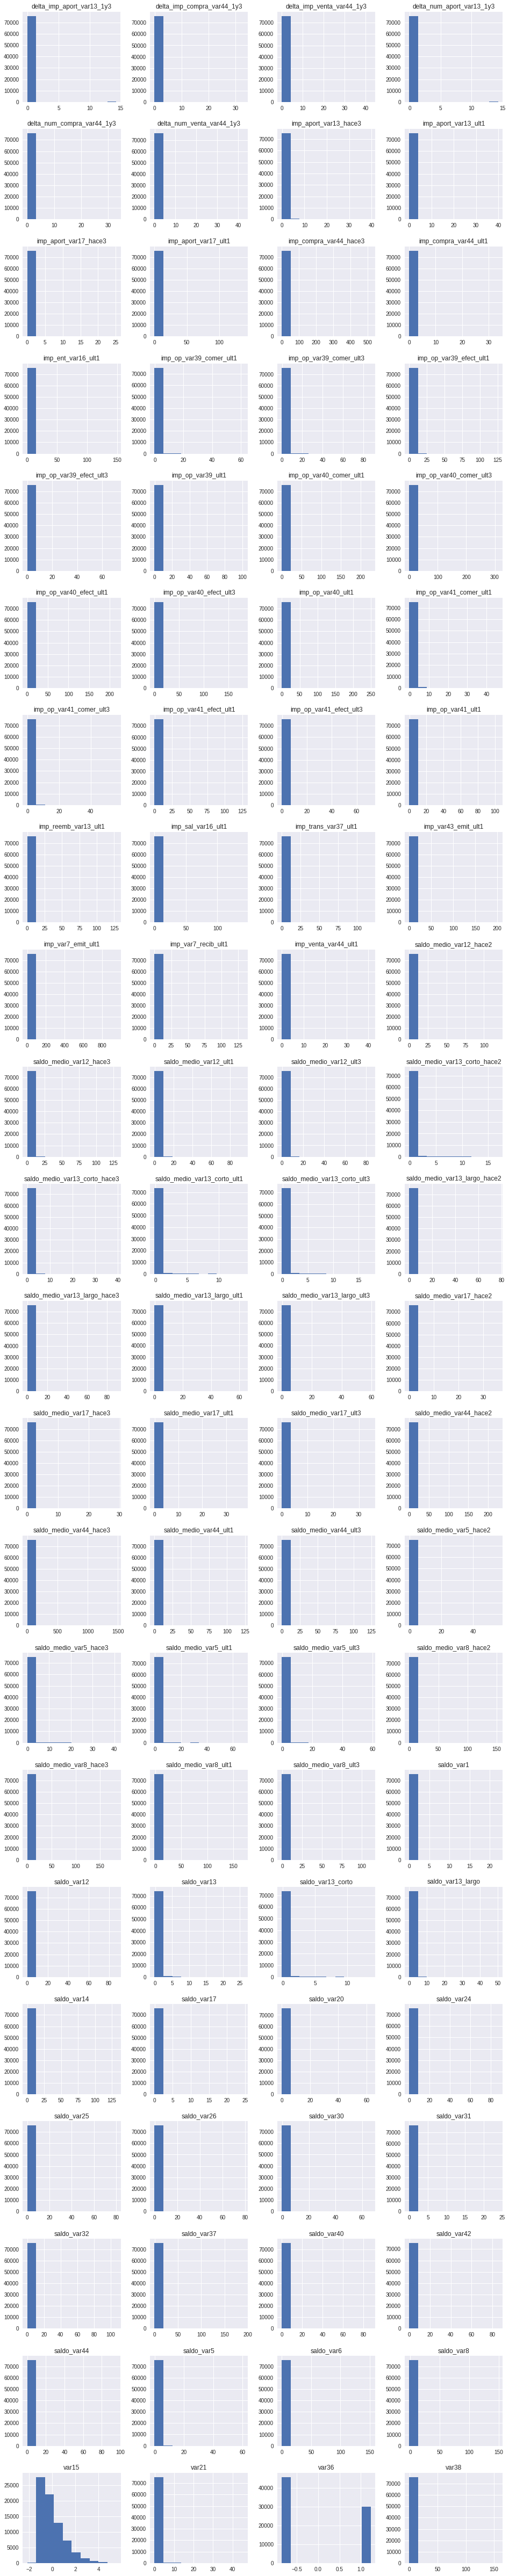

In [57]:
# Perform the same pre-processing of the numeric attributes
X_kaggle_data[columns_to_scale] = scaler.transform(X_kaggle_data[columns_to_scale])
X_kaggle_data[columns_to_scale].hist(layout=(dispRow,dispCol))
plt.show()

In [58]:
# # Perform one-hot-encoding on the categorical attributes
# X_kaggle_data = pd.get_dummies(X_kaggle_data)
# X_kaggle_data.info(verbose=True)

In [59]:
columns_original = X_original.columns.tolist()
columns_kaggle = X_kaggle_data.columns.tolist()
print('Attributes in the training data frame but not in the Kaggle test data frame:')
set(columns_original).difference(set(columns_kaggle))

Attributes in the training data frame but not in the Kaggle test data frame:


set()

In [60]:
print('Attributes in the Kaggle test data frame but not in the training data frame:')
set(columns_kaggle).difference(set(columns_original))

Attributes in the Kaggle test data frame but not in the training data frame:


set()

In [61]:
# Convert the dataframe to numpy array before the final prediction step
X_test_kaggle = X_kaggle_data.to_numpy()
print("X_test_kaggle.shape: {}".format(X_test_kaggle.shape))

X_test_kaggle.shape: (75818, 269)


In [62]:
probabilities_kaggle = final_model.predict(X_test_kaggle)
y_submission_kaggle['TARGET'] = probabilities_kaggle
print("y_submission_kaggle.shape: {}".format(y_submission_kaggle.shape))

y_submission_kaggle.shape: (75818, 2)


In [63]:
y_submission_kaggle.head()

,ID,TARGET
0,2,0.053583
1,5,0.051665
2,6,0.014806
3,7,0.025292
4,9,0.014721


In [64]:
submission_file = y_submission_kaggle.to_csv(header=True, index=False)
filename = 'submission_' + datetime.now().strftime('%Y%m%d-%H%M') + '.csv'
with open(filename, 'w') as f:
    f.write(submission_file)
    print('Completed writing output file: ' + filename)

Completed writing output file: submission_20200704-0141.csv


In [65]:
if (notifyStatus): status_notify("Phase 5 Finalize Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [66]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 10:34:51.713117
